# 

title: Water Rights Restored to the Gila River

subtitle: The impacts of irrigation on vegetation health in the Gila
River Valley

author:

-   Elsa Culler

-   Nate Quarderer

date: last-modified

image: /img/earth-analytics/water-rights/lesson-water-rights.png

image-alt: “Dry river with dead plants turns into a stream with living
plants”

description: \|

In 2004, the Akimel O’‘otham and Tohono O’’odham tribes won a water
rights settlement in the US Supreme Court. Using satellite imagery, we
can see the effects of irrigation water on the local vegetation.

learning-goals:

-   Open raster or image data using code

-   Combine raster data and vector data to crop images to an area of
    interest

-   Summarize raster values with stastics

-   Analyze a time-series of raster images

params:

id: stars

site_name: Gila River Indian Community

event: water rights case

data_dir: gila-river

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [45]:
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [46]:
# Import libraries
import geopandas as gpd # to work with vector spacial data 
import pandas as pd # to work with tabular data 

import hvplot.pandas # to work with interactive plots 
import rioxarray as rxr # to work with raster spacial data
import xarray as rx # to work with data arrays 

# STEP 4: Is the NDVI different within the **?meta:params.site_name** after the **?meta:params.event**?

You will compute the mean NDVI inside and outside the fire boundary.
First, use the code below to get a `GeoDataFrame` of the area outside
the Reservation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Check the variable names - Make sure that the code uses your
boundary <code>GeoDataFrame</code></li>
<li>How could you test if the geometry was modified correctly? Add some
code to take a look at the results.</li>
</ol></div></div>

In [47]:
# Compute the area outside the  Gila River Indian Community boundary 

outside_gila_gdf = (
    gpd.GeoDataFrame(geometry=boundary_gdf.envelope)
    .overlay(boundary_gdf, how= 'difference' ))

outside_gila_gdf


,geometry
0,"MULTIPOLYGON (((-112.30875 32.96704, -112.3087..."


<Axes: >

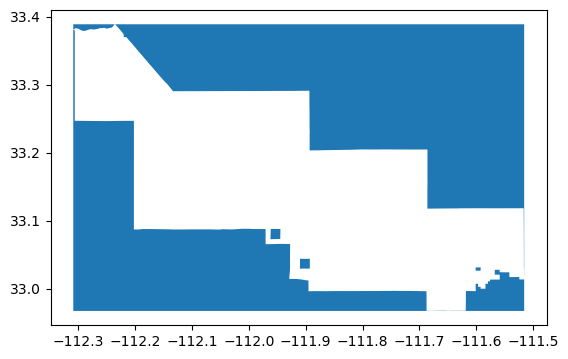

In [48]:
outside_gila_gdf.plot()

Next, clip your DataArray to the boundaries for both inside and outside
the reservation. You will need to replace the `GeoDataFrame` name with
your own. Check out the [lesson on clipping data with the `rioxarray`
library in the
textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT**
>
> It’s important to use `from_disk=True` when clipping large arrays like
> this. It allows the computer to use less valuable memory resources
> when clipping - you will probably find that otherwise the cell below
> crashes your kernel.

In [49]:
# Clip data to both inside and outside the boundary
ndvi_inside = ndvi_da.rio.clip(boundary_gdf.geometry, from_disk=True)
print(ndvi_inside)

ndvi_outside = ndvi_da.rio.clip(outside_gila_gdf.geometry, from_disk=True)
print(ndvi_outside)

<xarray.Dataset> Size: 47MB
Dimensions:      (x: 379, y: 202, date: 154)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.38 33.38 33.38 ... 32.97 32.97 32.97
  * date         (date) datetime64[ns] 1kB 2001-01-14 2001-01-16 ... 2022-01-24
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 47MB nan nan nan nan ... nan nan nan nan
<xarray.Dataset> Size: 48MB
Dimensions:      (x: 380, y: 203, date: 154)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
  * date         (date) datetime64[ns] 1kB 2001-01-14 2001-01-16 ... 2022-01-24
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 48MB 0.6146 0.3796 ... 0.1736 0.2146


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>For <strong>both inside and outside</strong> the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary:</p>
<ul>
<li>Group the data by year</li>
<li>Take the mean. You always need to tell reducing methods in
<code>xarray</code> what dimensions you want to reduce. When you want to
summarize data across <strong>all</strong> dimensions, you can use the
<code>...</code> syntax, e.g. <code>.mean(...)</code> as a
shorthand.</li>
<li>Select the NDVI variable</li>
<li>Convert to a DataFrame using the <code>to_dataframe()</code>
method</li>
<li>Join the two DataFrames for plotting using the <code>.join()</code>
method. You will need to rename the columns using the
<code>lsuffix=</code> and <code>rsuffix=</code> parameters</li>
</ul>
<p>Finally, plot annual July means for both inside and outside the
Reservation on the same plot.</p></div></div>

> **GOTCHA ALERT**
>
> The DateIndex in pandas is a little different from the Datetime
> Dimension in xarray. You will need to use the `.dt.year` syntax to
> access information about the year, not just `.year`.

In [50]:
# Compute mean annual July NDVI
july_ndvi_inside_df = (ndvi_inside
                        .groupby(ndvi_inside.date.dt.year)
                        .mean(...)
                        .NDVI.to_dataframe())
print('Mean NDVI inside boundary\n',july_ndvi_inside_df.head())

july_ndvi_outside_df = (ndvi_outside
                        .groupby(ndvi_outside.date.dt.year)
                        .mean(...)
                        .NDVI.to_dataframe())
print(july_ndvi_outside_df.head())

Mean NDVI inside boundary
       band  spatial_ref      NDVI
year                             
2001     1            0  0.199645
2002     1            0  0.177933
2003     1            0  0.187302
2004     1            0  0.176162
2005     1            0  0.238630
      band  spatial_ref      NDVI
year                             
2001     1            0  0.247629
2002     1            0  0.226726
2003     1            0  0.229889
2004     1            0  0.221753
2005     1            0  0.255275


In [51]:
## join inside and outside boundary df and rename columns
july_ndvi_df = (july_ndvi_inside_df[['NDVI']]
                .join(july_ndvi_outside_df[['NDVI']],
                    lsuffix='Inside boundry',
                    rsuffix='Outside boundry'))
july_ndvi_df

,NDVIInside boundry,NDVIOutside boundry
year,,
2001,0.199645,0.247629
2002,0.177933,0.226726
2003,0.187302,0.229889
2004,0.176162,0.221753
2005,0.238630,0.255275
2006,0.211491,0.235571
2007,0.181710,0.211984
2008,0.201902,0.237739
2009,0.179118,0.218907


Now, take the difference between outside and inside the site boundary
and plot that. What do you observe? Don’t forget to write a headline and
description of your plot!

In [52]:
# Plot difference inside and outside the boundary
july_ndvi_df.hvplot(title='Mean july NDVI inside outside boundary')

:NdOverlay   [Variable]
   :Curve   [year]   (value)

<Axes: xlabel='year'>

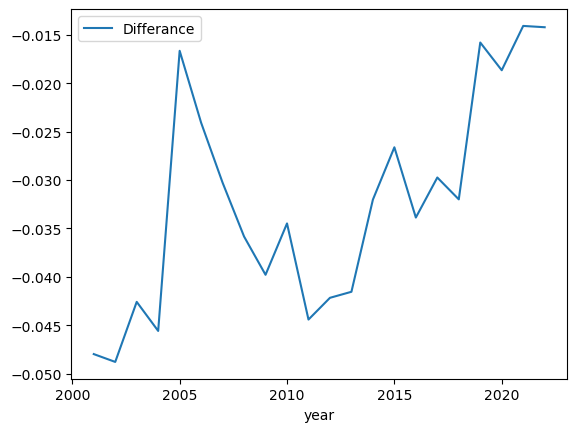

In [59]:
# Plot difference inside and outside the boundary
july_ndvi_df['Differance'] = (july_ndvi_df['NDVIInside boundry']
                               - july_ndvi_df['NDVIOutside boundry'])
july_ndvi_df.plot(y='Differance')

YOUR HEADLINE AND DESCRIPTION HERE

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [61]:
%store 

Stored variables and their in-db values:
aitsn_gdf                ->     AIANNHCE TRSUBCE   TRSUBNS    GEOID           
axes                     -> array([<Axes: title={'center': 'NDVI-Gila River 20
boundary_gdf             ->                                             geomet
fig                      -> <Figure size 1200x400 with 4 Axes>
ndvi_da                  -> <xarray.Dataset> Size: 48MB
Dimensions:      (date
ndvi_das                 -> [<xarray.DataArray 'NDVI' (date: 1, y: 203, x: 382
ndvi_diff                -> '<unavailable>'
ndvi_paths               -> [PosixPath('/workspaces/data/gila-rj-veg-data/gila
project                  -> <earthpy.project.Project object at 0x7f8db838ba50>


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!